# <font color=blue>Building a dashboard for daily changing stock prices with API online</font>
### JSON file received has stock information for a particular stock
### Receives JSON data file as string and convert it to dictionary format to easily access data
### Data cleaning is done to format datetime, store them in correct order for plotting
### Stock prices and datetime are stored in Python lists for convenience
### Basic calculation done in numpy to find percentage change for display and relative stock performance graph
# <font color=green>Dashboard is split into two halves</font>
### The top half has 6 small graphs to show daily movement chart of each tech stock (FAANGM)
### The bottom half has stock index movement normalized by opening stock price in order to track relative performance of each stock to others over the day

#### Packages used include urllib for accessing API, json to convert string into dictionary, datetime for formatting date time, numpy for calculations and matplotlib for graph plotting


In [1]:
#Access and read API contents
#Have to read 3 APIs at a time due to limitations of Alpha Vantage API for free use (max 5 accesses per minute)
#Unable to read all 6 stock APIs (FAANGM) at once

import urllib.request, json
#urllib is for opening URLs to get info
#json is for reading raw string from URL into json file

#Limit of 5 API run per min, so need to run 3 by 3

#save url inside variable as raw string
urlAAPL = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=CQ46NBPLL6S1GP9C"
urlMSFT = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=CQ46NBPLL6S1GP9C"
urlAMZN = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AMZN&interval=5min&apikey=CQ46NBPLL6S1GP9C"
# urlGOOGL = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GOOGL&interval=5min&apikey=CQ46NBPLL6S1GP9C"
# urlFB = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=FB&interval=5min&apikey=CQ46NBPLL6S1GP9C"
# urlNFLX = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=NFLX&interval=5min&apikey=CQ46NBPLL6S1GP9C"

#use urllib.request.urlopen() to access API from URL links
responseAAPL = urllib.request.urlopen(urlAAPL)
responseMSFT = urllib.request.urlopen(urlMSFT)
responseAMZN = urllib.request.urlopen(urlAMZN)
# responseGOOGL = urllib.request.urlopen(urlGOOGL)
# responseFB = urllib.request.urlopen(urlFB)
# responseNFLX = urllib.request.urlopen(urlNFLX)

#from var saved (HTTPresponse type), use .read() + .decode('utf-8')
stringAAPL = responseAAPL.read().decode('utf-8')
stringMSFT = responseMSFT.read().decode('utf-8')
stringAMZN = responseAMZN.read().decode('utf-8')
# stringGOOGL = responseGOOGL.read().decode('utf-8')
# stringFB = responseFB.read().decode('utf-8')
# stringNFLX = responseNFLX.read().decode('utf-8')

print(stringAAPL)
print(stringMSFT)

{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2019-06-07 16:00:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2019-06-07 16:00:00": {
            "1. open": "189.9500",
            "2. high": "190.2400",
            "3. low": "189.9200",
            "4. close": "190.1400",
            "5. volume": "1613881"
        },
        "2019-06-07 15:55:00": {
            "1. open": "190.0200",
            "2. high": "190.1000",
            "3. low": "189.9100",
            "4. close": "189.9600",
            "5. volume": "451434"
        },
        "2019-06-07 15:50:00": {
            "1. open": "190.0100",
            "2. high": "190.1500",
            "3. low": "189.9000",
            "4. close": "190.0100",
            "5. volume": "644455"
        },
        "2019-06-

In [2]:
#Access and read API contents
#Have to read 3 APIs at a time due to limitations of Alpha Vantage API for free use (max 5 accesses per minute)
#Unable to read all 6 stock APIs (FAANGM) at onceprint(stringAMZN)

#save url inside variable as raw string
# urlAAPL = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=CQ46NBPLL6S1GP9C"
# urlMSFT = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=CQ46NBPLL6S1GP9C"
# urlAMZN = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AMZN&interval=5min&apikey=CQ46NBPLL6S1GP9C"
urlGOOGL = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GOOGL&interval=5min&apikey=CQ46NBPLL6S1GP9C"
urlFB = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=FB&interval=5min&apikey=CQ46NBPLL6S1GP9C"
urlNFLX = r"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=NFLX&interval=5min&apikey=CQ46NBPLL6S1GP9C"

#use urllib.request.urlopen()
# responseAAPL = urllib.request.urlopen(urlAAPL)
# responseMSFT = urllib.request.urlopen(urlMSFT)
# responseAMZN = urllib.request.urlopen(urlAMZN)
responseGOOGL = urllib.request.urlopen(urlGOOGL)
responseFB = urllib.request.urlopen(urlFB)
responseNFLX = urllib.request.urlopen(urlNFLX)

#from var saved (HTTPresponse type), use .read() + .decode('utf-8')
# stringAAPL = responseAAPL.read().decode('utf-8')
# stringMSFT = responseMSFT.read().decode('utf-8')
# stringAMZN = responseAMZN.read().decode('utf-8')
stringGOOGL = responseGOOGL.read().decode('utf-8')
stringFB = responseFB.read().decode('utf-8')
stringNFLX = responseNFLX.read().decode('utf-8')

print(stringGOOGL)
print(stringFB)
print(stringNFLX)

{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "GOOGL",
        "3. Last Refreshed": "2019-06-07 16:00:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2019-06-07 16:00:00": {
            "1. open": "1068.4600",
            "2. high": "1069.9700",
            "3. low": "1068.0000",
            "4. close": "1069.0000",
            "5. volume": "81889"
        },
        "2019-06-07 15:55:00": {
            "1. open": "1068.4050",
            "2. high": "1069.1500",
            "3. low": "1067.6801",
            "4. close": "1067.7700",
            "5. volume": "48572"
        },
        "2019-06-07 15:50:00": {
            "1. open": "1068.9100",
            "2. high": "1068.9600",
            "3. low": "1067.7200",
            "4. close": "1068.2000",
            "5. volume": "44457"
        },
        

In [5]:
#Build lists to store information for stock prices at (open, close, high, low) at 5 minute intervals
#This step can be built into a Python Class in the future to allow users to select their own stock names

#https://www.powercms.in/blog/how-get-json-data-remote-url-python-script

import urllib.request, json
#from class datetime import subclass datetime
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator
%matplotlib inline

import numpy as np


#load string saved into json data
jsondataAAPL = json.loads(stringAAPL)
jsondataMSFT = json.loads(stringMSFT)
jsondataAMZN = json.loads(stringAMZN)
jsondataGOOGL = json.loads(stringGOOGL)
jsondataFB = json.loads(stringFB)
jsondataNFLX = json.loads(stringNFLX)


#Get all keys of time series (datetime) as string type and save it onto a list
timeAAPL = list(reversed(list(jsondataAAPL['Time Series (5min)'].keys())))
timeMSFT = list(reversed(list(jsondataMSFT['Time Series (5min)'].keys())))
timeAMZN = list(reversed(list(jsondataAMZN['Time Series (5min)'].keys())))
timeGOOGL = list(reversed(list(jsondataGOOGL['Time Series (5min)'].keys())))
timeFB = list(reversed(list(jsondataFB['Time Series (5min)'].keys())))
timeNFLX = list(reversed(list(jsondataNFLX['Time Series (5min)'].keys())))
    
AAPLopen = []
AAPLhigh = []
AAPLlow = []
AAPLclose = []
MSFTopen = []
MSFThigh = []
MSFTlow = []
MSFTclose = []
AMZNopen = []
AMZNhigh = []
AMZNlow = []
AMZNclose = []
GOOGLopen = []
GOOGLhigh = []
GOOGLlow = []
GOOGLclose = []
FBopen = []
FBhigh = []
FBlow = []
FBclose = []
NFLXopen = []
NFLXhigh = []
NFLXlow = []
NFLXclose = []
timeAAPL_s = []
timeMSFT_s = []
timeAMZN_s = []
timeGOOGL_s = []
timeFB_s = []
timeNFLX_s = []

#Get all the stock information using the datetime key used in the JSON packet
for string in timeAAPL:
    timeAAPL_s.append(string[2:16])
    AAPLopen.append(float(jsondataAAPL['Time Series (5min)'][string]['1. open']))
    AAPLhigh.append(float(jsondataAAPL['Time Series (5min)'][string]['2. high']))
    AAPLlow.append(float(jsondataAAPL['Time Series (5min)'][string]['3. low']))
    AAPLclose.append(float(jsondataAAPL['Time Series (5min)'][string]['4. close']))
    
for string in timeMSFT:
    timeMSFT_s.append(string[2:16])
    MSFTopen.append(float(jsondataMSFT['Time Series (5min)'][string]['1. open']))
    MSFThigh.append(float(jsondataMSFT['Time Series (5min)'][string]['2. high']))
    MSFTlow.append(float(jsondataMSFT['Time Series (5min)'][string]['3. low']))
    MSFTclose.append(float(jsondataMSFT['Time Series (5min)'][string]['4. close']))

for string in timeAMZN:
    timeAMZN_s.append(string[2:16])
    AMZNopen.append(float(jsondataAMZN['Time Series (5min)'][string]['1. open']))
    AMZNhigh.append(float(jsondataAMZN['Time Series (5min)'][string]['2. high']))
    AMZNlow.append(float(jsondataAMZN['Time Series (5min)'][string]['3. low']))
    AMZNclose.append(float(jsondataAMZN['Time Series (5min)'][string]['4. close']))

for string in timeGOOGL:
    timeGOOGL_s.append(string[2:16])
    GOOGLopen.append(float(jsondataGOOGL['Time Series (5min)'][string]['1. open']))
    GOOGLhigh.append(float(jsondataGOOGL['Time Series (5min)'][string]['2. high']))
    GOOGLlow.append(float(jsondataGOOGL['Time Series (5min)'][string]['3. low']))
    GOOGLclose.append(float(jsondataGOOGL['Time Series (5min)'][string]['4. close']))
    
for string in timeFB:
    timeFB_s.append(string[2:16])
    FBopen.append(float(jsondataFB['Time Series (5min)'][string]['1. open']))
    FBhigh.append(float(jsondataFB['Time Series (5min)'][string]['2. high']))
    FBlow.append(float(jsondataFB['Time Series (5min)'][string]['3. low']))
    FBclose.append(float(jsondataFB['Time Series (5min)'][string]['4. close']))
    
for string in timeNFLX:
    timeNFLX_s.append(string[2:16])
    NFLXopen.append(float(jsondataNFLX['Time Series (5min)'][string]['1. open']))
    NFLXhigh.append(float(jsondataNFLX['Time Series (5min)'][string]['2. high']))
    NFLXlow.append(float(jsondataNFLX['Time Series (5min)'][string]['3. low']))
    NFLXclose.append(float(jsondataNFLX['Time Series (5min)'][string]['4. close']))
    
    
# AAPLdailyopen_n = []
# MSFTdailyopen_n = []
# AMZNdailyopen_n = []
# GOOGLdailyopen_n = []
# FBdailyopen_n = []
# NFLXdailyopen_n = []
  
#Create normalized list of 9 companies stock prices by the price at opening
#This is used for plotting the relative stock performance chart (% movement in a day) for all 6 stocks
AAPLdailyopen_n = np.array(AAPLopen)/AAPLopen[0]
MSFTdailyopen_n = np.array(MSFTopen)/MSFTopen[0]
AMZNdailyopen_n = np.array(AMZNopen)/AMZNopen[0]
GOOGLdailyopen_n = np.array(GOOGLopen)/GOOGLopen[0]
FBdailyopen_n = np.array(FBopen)/FBopen[0]
NFLXdailyopen_n = np.array(NFLXopen)/NFLXopen[0]

#Get percentage change of each stock to show in the title of graphs
AAPL_change = round((AAPLopen[-1] - AAPLopen[0])/AAPLopen[0] * 100,2)
AMZN_change = round((AMZNopen[-1] - AMZNopen[0])/AMZNopen[0] * 100,2)
GOOGL_change = round((GOOGLopen[-1] - GOOGLopen[0])/GOOGLopen[0] * 100,2)
FB_change = round((FBopen[-1] - FBopen[0])/FBopen[0] * 100,2)
MSFT_change = round((MSFTopen[-1] - MSFTopen[0])/MSFTopen[0] * 100,2)
NFLX_change = round((NFLXopen[-1] - NFLXopen[0])/NFLXopen[0] * 100,2)

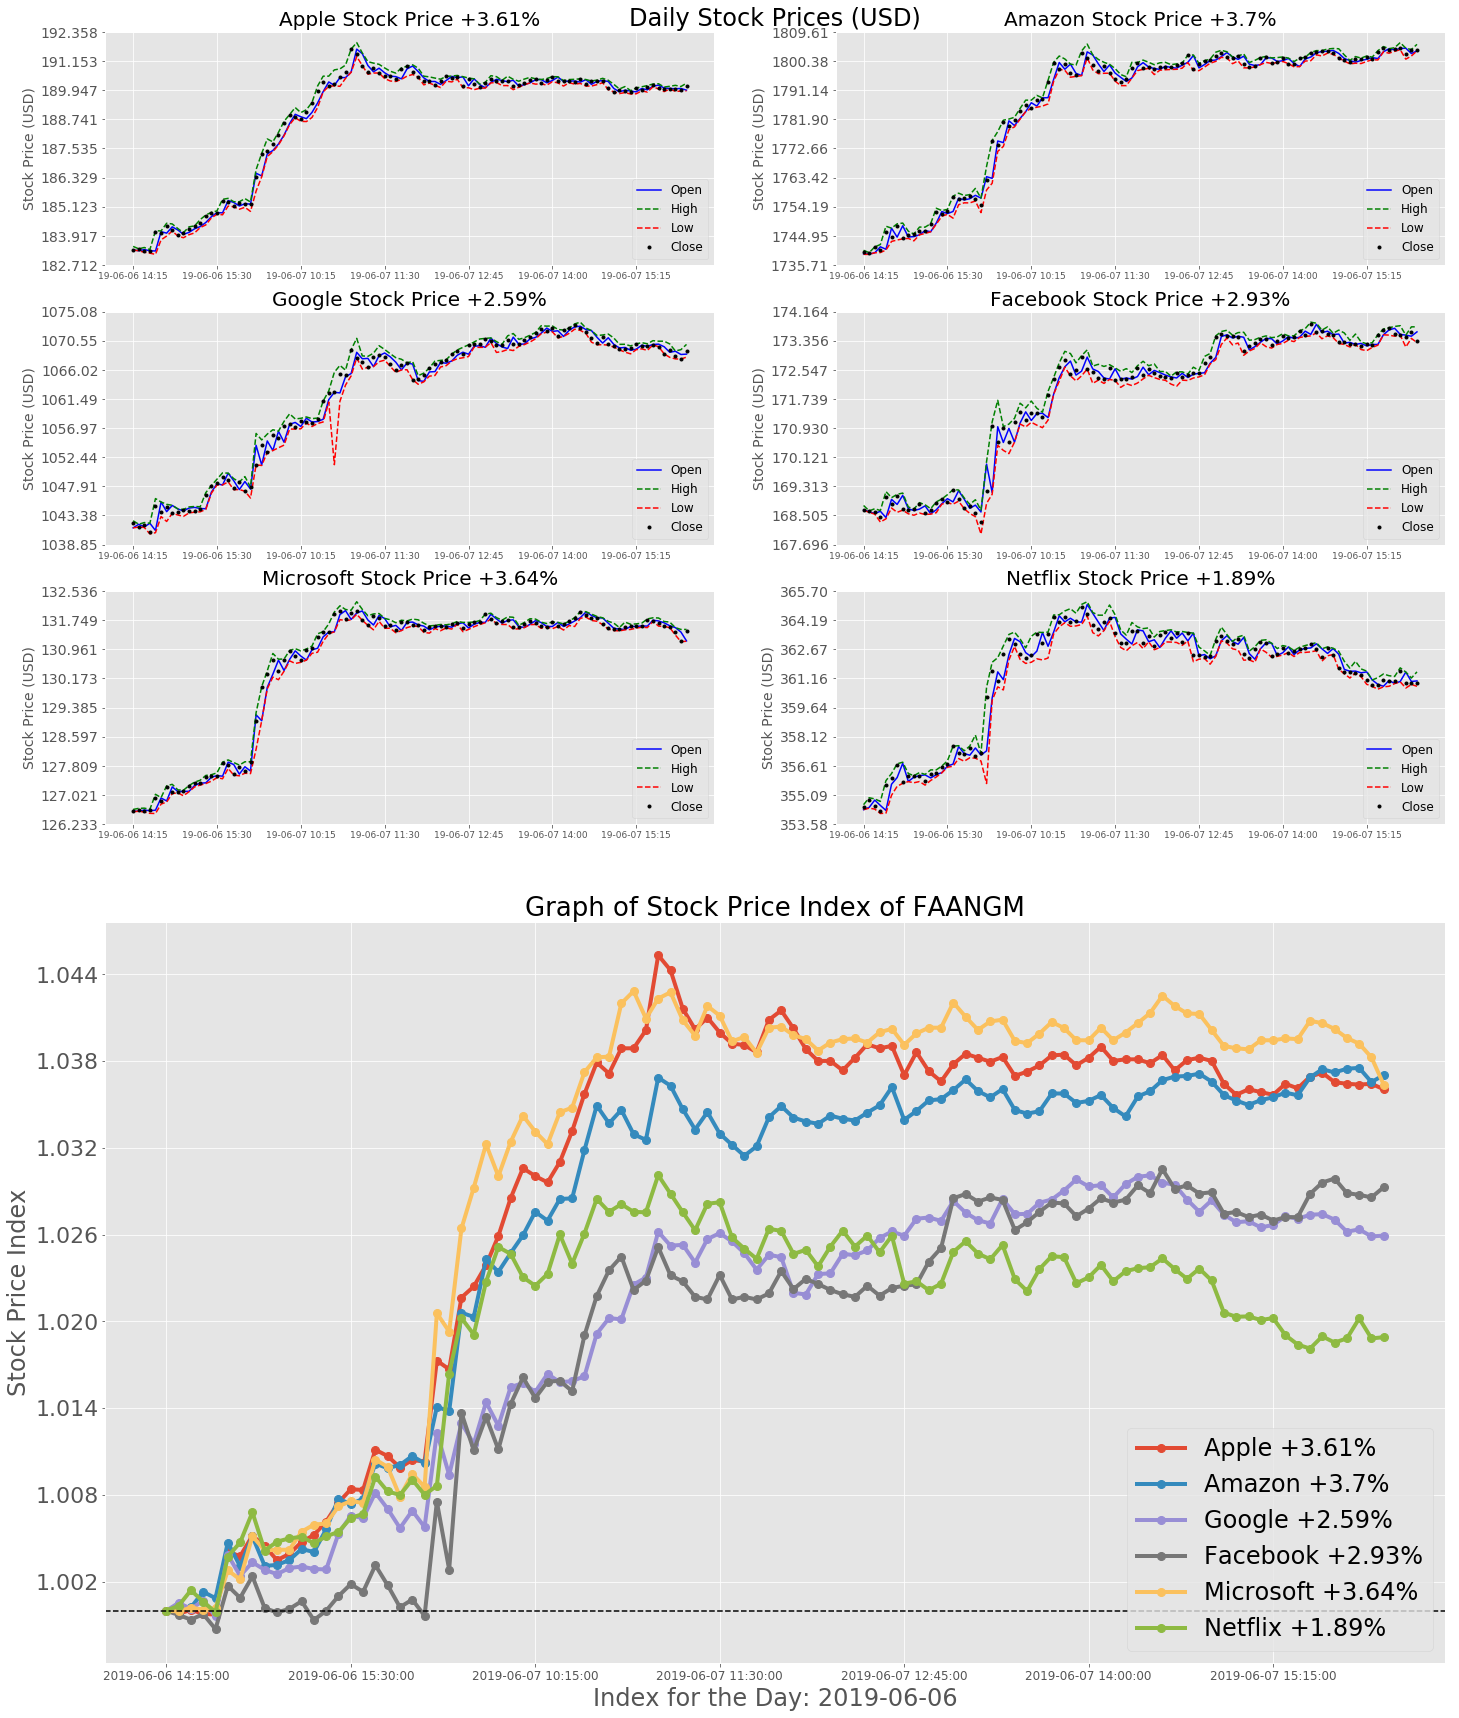

Dashboard saved as: Dashboard_2019-06-06.jpg in local directory
Dashboard saved as: Dashboard_2019-06-06.pdf in local directory


In [25]:
#Create dashboard of stocks
#There will be 6 small graphs at the top for the daily stock movement for the 6 US tech stocks (FAANGM)
#A big graph at the bottom comparing the relative performance (in %) of each stock over the day
#Instead of using the candlestick plot, I used a continuous line plot with dotted lines signifying the higher/lower bound

#Plan of subplot layering (1x1 one for title, 2x1 for overlaid graphs, 6x3 one for small graphs but only occupy top 9 spaces)

#Create big figure
stocks = plt.figure(1,figsize=(24,30))
plt.style.use('ggplot')

#Create big subplot for title and remove frame (frameon=False), remove tick parameters
stocks_title = stocks.add_subplot(111, frameon=False) #remove frame but need remove ticks/axes
stocks_title.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
stocks_title.set_title('Daily Stock Prices (USD)', fontsize=24)

#Determine where to put legend board in relative stock performance graph
stockgoodperformance = 0
#Default location for legends of small graphs is top right, will change to bottom right depending on graph
AAPLlegendloc = 1
AMZNlegendloc = 1
GOOGLlegendloc = 1
FBlegendloc = 1
MSFTlegendloc = 1
NFLXlegendloc = 1

#Find number of stocks closing higher than when they opened
if AAPLdailyopen_n[-1] > AAPLdailyopen_n[0]:
    stockgoodperformance += 1
    AAPLlegendloc = 4
if AMZNdailyopen_n[-1] > AMZNdailyopen_n[0]:
    stockgoodperformance += 1
    AMZNlegendloc = 4
if GOOGLdailyopen_n[-1] > GOOGLdailyopen_n[0]:
    stockgoodperformance += 1
    GOOGLlegendloc = 4
if FBdailyopen_n[-1] > FBdailyopen_n[0]:
    stockgoodperformance += 1
    FBlegendloc = 4
if MSFTdailyopen_n[-1] > MSFTdailyopen_n[0]:
    stockgoodperformance += 1
    MSFTlegendloc = 4
if NFLXdailyopen_n[-1] > NFLXdailyopen_n[0]:
    stockgoodperformance += 1
    NFLXlegendloc = 4

if stockgoodperformance > 3:
    legendloc = 4 #stocks mostly rised, place legend bottom right
elif stockgoodperformance < 3:
    legendloc = 1 #stocks mostly tumbled, place legend top right
else: #Mixed, place legend middle-top
    legendloc = 9


#Create big subplot for mega chart using 2x1 plot using normal .add_subplot
#Change x-axis to be integer (year) and y-axis to be integer (price_index)
stocks_big = stocks.add_subplot(212)
#If apple stock is higher than the start (AAPLlegendloc == 4), add + sign in the stock price
#If apple stock is lower than the start, number has - sign so + sign is omitted
#Repeat for all other stocks
if AAPLlegendloc == 4:
    AAPL_n = stocks_big.plot(timeAAPL, AAPLdailyopen_n, '-o', label='Apple +'+str(AAPL_change)+'%', linewidth = 4, markersize=8)
else:
    AAPL_n = stocks_big.plot(timeAAPL, AAPLdailyopen_n, '-o', label='Apple '+str(AAPL_change)+'%', linewidth = 4, markersize=8)

if AMZNlegendloc == 4:
    AMZN_n = stocks_big.plot(timeAMZN, AMZNdailyopen_n, '-o', label='Amazon +'+str(AMZN_change)+'%', linewidth = 4, markersize=8)
else:
    AMZN_n = stocks_big.plot(timeAMZN, AMZNdailyopen_n, '-o', label='Amazon '+str(AMZN_change)+'%', linewidth = 4, markersize=8)

if GOOGLlegendloc == 4:
    GOOGL_n = stocks_big.plot(timeGOOGL, GOOGLdailyopen_n, '-o', label='Google +'+str(GOOGL_change)+'%', linewidth = 4, markersize=8)
else:
    GOOGL_n = stocks_big.plot(timeGOOGL, GOOGLdailyopen_n, '-o', label='Google '+str(GOOGL_change)+'%', linewidth = 4, markersize=8)

if FBlegendloc == 4:
    FB_n = stocks_big.plot(timeFB, FBdailyopen_n, '-o', label='Facebook +'+str(FB_change)+'%', linewidth = 4, markersize=8)
else:
    FB_n = stocks_big.plot(timeFB, FBdailyopen_n, '-o', label='Facebook '+str(FB_change)+'%', linewidth = 4, markersize=8)

if MSFTlegendloc == 4:
    MSFT_n = stocks_big.plot(timeMSFT, MSFTdailyopen_n, '-o', label='Microsoft +'+str(MSFT_change)+'%', linewidth = 4, markersize=8)
else:
    MSFT_n = stocks_big.plot(timeMSFT, MSFTdailyopen_n, '-o', label='Microsoft '+str(MSFT_change)+'%', linewidth = 4, markersize=8)

if NFLXlegendloc == 4:
    NFLX_n = stocks_big.plot(timeNFLX, NFLXdailyopen_n, '-o', label='Netflix +'+str(NFLX_change)+'%', linewidth = 4, markersize=8)
else:
    NFLX_n = stocks_big.plot(timeNFLX, NFLXdailyopen_n, '-o', label='Netflix '+str(NFLX_change)+'%', linewidth = 4, markersize=8)
    
#Get all handle/variable storing the legend in a tuple from 0-8 and also all label of the legend var in a tuple from 0-8
#Each element n of the tuple has a pair of handle/label associated
handlesN, labelsN = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4,5]
stocks_big.legend([handlesN[idx] for idx in order],[labelsN[idx] for idx in order], loc=legendloc, fontsize=24)
#Possible improvement is to detect initial and final position of graphs and relocate legend loc=1,2,3,4 accordingly every day
stocks_big.tick_params(axis='y', which='major', labelsize=22)
stocks_big.tick_params(axis='x', which='major', labelsize=12)
stocks_big.set_title('Graph of Stock Price Index of FAANGM', fontsize=26)
#Get datetime and add it to x label
stocks_big.set_xlabel('Index for the Day: ' + timeAAPL[0][0:10],fontsize=24)
stocks_big.set_ylabel('Stock Price Index',fontsize=24)
stocks_big.xaxis.set_major_locator(MaxNLocator(integer=True))
stocks_big.yaxis.set_major_locator(MaxNLocator(integer=True))

#Horizontal line denoting the starting stock index at beginning of time
stocks_big.axhline(y=1, color='black', linestyle='--')


#Create matplotlib figure with subplot size 6x3 plot using fig, axes_small (axes_small is np.array)
#Found out that it is easier to use big figure and overlay many different size of subplot (1x1 title), (2x1 big chart),
#(6x3 small charts) into a single matplotlib figure
#instead of using fig, axes to define fig and axes (matrix size) tgt since there is varying sizes


#Plot the individual stock graphs for each stock from position 1 to 6 in 6x2 matrix
#Note that positions 7-12 taken up by big graph. It is equivalent to add_subplot(212) - position 2 in 2x1 matrix

AAPLplot = stocks.add_subplot(621)
#AAPLplot.set_xlabel('Date & Time',fontsize=14)
AAPLplot.set_ylabel('Stock Price (USD)',fontsize=14)
if AAPLlegendloc == 4:
    AAPLplot.set_title('Apple Stock Price +'+str(AAPL_change)+'%',fontsize=20)
else:
    AAPLplot.set_title('Apple Stock Price '+str(AAPL_change)+'%',fontsize=20)
AAPLplot.tick_params(axis='y', which='major', labelsize=14)
AAPLplot.tick_params(axis='x', which='major', labelsize=9)
AAPLdailyopen = AAPLplot.plot(timeAAPL_s,AAPLopen,color='blue', label='Open')
AAPLdailyhigh = AAPLplot.plot(timeAAPL_s,AAPLhigh,'--',color='green', label='High')
AAPLdailylow = AAPLplot.plot(timeAAPL_s,AAPLlow,'--',color='red', label='Low')
AAPLdailyclose = AAPLplot.plot(timeAAPL_s,AAPLclose,'.', color='black', label='Close')
AAPLplot.legend(loc=AAPLlegendloc, fontsize=12)
#Major locator helps in choosing the right numbers for x and y axis to be more presentable
AAPLplot.xaxis.set_major_locator(MaxNLocator(integer=True))
AAPLplot.yaxis.set_major_locator(LinearLocator(9))

AMZNplot = stocks.add_subplot(622)
#AMZNplot.set_xlabel('Date & Time',fontsize=14)
AMZNplot.set_ylabel('Stock Price (USD)',fontsize=14)
if AMZNlegendloc == 4:
    AMZNplot.set_title('Amazon Stock Price +'+str(AMZN_change)+'%',fontsize=20)
else:
    AMZNplot.set_title('Amazon Stock Price '+str(AMZN_change)+'%',fontsize=20)    
AMZNplot.tick_params(axis='y', which='major', labelsize=14)
AMZNplot.tick_params(axis='x', which='major', labelsize=9)
AMZNdailyopen = AMZNplot.plot(timeAMZN_s,AMZNopen,color='blue', label='Open')
AMZNdailyhigh = AMZNplot.plot(timeAMZN_s,AMZNhigh,'--',color='green', label='High')
AMZNdailylow = AMZNplot.plot(timeAMZN_s,AMZNlow,'--',color='red', label='Low')
AMZNdailyclose = AMZNplot.plot(timeAMZN_s,AMZNclose,'.', color='black', label='Close')
AMZNplot.legend(loc=AMZNlegendloc, fontsize=12)
AMZNplot.xaxis.set_major_locator(MaxNLocator(integer=True))
AMZNplot.yaxis.set_major_locator(LinearLocator(9))

GOOGLplot = stocks.add_subplot(623)
#GOOGLplot.set_xlabel('Date & Time',fontsize=14)
GOOGLplot.set_ylabel('Stock Price (USD)',fontsize=14)
if GOOGLlegendloc == 4:
    GOOGLplot.set_title('Google Stock Price +'+str(GOOGL_change)+'%',fontsize=20)
else:
    GOOGLplot.set_title('Google Stock Price '+str(GOOGL_change)+'%',fontsize=20)
GOOGLplot.tick_params(axis='y', which='major', labelsize=14)
GOOGLplot.tick_params(axis='x', which='major', labelsize=9)
GOOGLdailyopen = GOOGLplot.plot(timeGOOGL_s,GOOGLopen,color='blue', label='Open')
GOOGLdailyhigh = GOOGLplot.plot(timeGOOGL_s,GOOGLhigh,'--',color='green', label='High')
GOOGLdailylow = GOOGLplot.plot(timeGOOGL_s,GOOGLlow,'--',color='red', label='Low')
GOOGLdailyclose = GOOGLplot.plot(timeGOOGL_s,GOOGLclose,'.', color='black', label='Close')
GOOGLplot.legend(loc=GOOGLlegendloc, fontsize=12)
GOOGLplot.xaxis.set_major_locator(MaxNLocator(integer=True))
GOOGLplot.yaxis.set_major_locator(LinearLocator(9))

FBplot = stocks.add_subplot(624)
#FBplot.set_xlabel('Date & Time',fontsize=14)
FBplot.set_ylabel('Stock Price (USD)',fontsize=14)
if FBlegendloc == 4:
    FBplot.set_title('Facebook Stock Price +'+str(FB_change)+'%',fontsize=20)
else:
    FBplot.set_title('Facebook Stock Price '+str(FB_change)+'%',fontsize=20)
FBplot.tick_params(axis='y', which='major', labelsize=14)
FBplot.tick_params(axis='x', which='major', labelsize=9)
FBdailyopen = FBplot.plot(timeFB_s,FBopen,color='blue', label='Open')
FBdailyhigh = FBplot.plot(timeFB_s,FBhigh,'--',color='green', label='High')
FBdailylow = FBplot.plot(timeFB_s,FBlow,'--',color='red', label='Low')
FBdailyclose = FBplot.plot(timeFB_s,FBclose,'.', color='black', label='Close')
FBplot.legend(loc=FBlegendloc, fontsize=12)
FBplot.xaxis.set_major_locator(MaxNLocator(integer=True))
FBplot.yaxis.set_major_locator(LinearLocator(9))

MSFTplot = stocks.add_subplot(625)
#MSFTplot.set_xlabel('Date & Time',fontsize=14)
MSFTplot.set_ylabel('Stock Price (USD)',fontsize=14)
if MSFTlegendloc == 4:
    MSFTplot.set_title('Microsoft Stock Price +'+str(MSFT_change)+'%',fontsize=20)
else:
    MSFTplot.set_title('Microsoft Stock Price '+str(MSFT_change)+'%',fontsize=20)
MSFTplot.tick_params(axis='y', which='major', labelsize=14)
MSFTplot.tick_params(axis='x', which='major', labelsize=9)
MSFTdailyopen = MSFTplot.plot(timeMSFT_s,MSFTopen,color='blue', label='Open')
MSFTdailyhigh = MSFTplot.plot(timeMSFT_s,MSFThigh,'--',color='green', label='High')
MSFTdailylow = MSFTplot.plot(timeMSFT_s,MSFTlow,'--',color='red', label='Low')
MSFTdailyclose = MSFTplot.plot(timeMSFT_s,MSFTclose,'.', color='black', label='Close')
MSFTplot.legend(loc=MSFTlegendloc, fontsize=12)
MSFTplot.xaxis.set_major_locator(MaxNLocator(integer=True))
MSFTplot.yaxis.set_major_locator(LinearLocator(9))

NFLXplot = stocks.add_subplot(626)
#NFLXplot.set_xlabel('Date & Time',fontsize=14)
NFLXplot.set_ylabel('Stock Price (USD)',fontsize=14)
if NFLXlegendloc == 4:
    NFLXplot.set_title('Netflix Stock Price +'+str(NFLX_change)+'%',fontsize=20)
else:
    NFLXplot.set_title('Netflix Stock Price '+str(NFLX_change)+'%',fontsize=20)
NFLXplot.tick_params(axis='y', which='major', labelsize=14)
NFLXplot.tick_params(axis='x', which='major', labelsize=9)
NFLXdailyopen = NFLXplot.plot(timeNFLX_s,NFLXopen,color='blue', label='Open')
NFLXdailyhigh = NFLXplot.plot(timeNFLX_s,NFLXhigh,'--',color='green', label='High')
NFLXdailylow = NFLXplot.plot(timeNFLX_s,NFLXlow,'--',color='red', label='Low')
NFLXdailyclose = NFLXplot.plot(timeNFLX_s,NFLXclose,'.', color='black', label='Close')
NFLXplot.legend(loc=NFLXlegendloc, fontsize=12)
NFLXplot.xaxis.set_major_locator(MaxNLocator(integer=True))
NFLXplot.yaxis.set_major_locator(LinearLocator(9))

#Save as jpg, pdf with today's date
jpg_name = 'Dashboard_'+str(timeAAPL[0][0:10])+'.jpg'
pdf_name = 'Dashboard_'+str(timeAAPL[0][0:10])+'.pdf'
stocks.savefig(jpg_name)
stocks.savefig(pdf_name)

#Show all plots
plt.show()

#Notification if there are no errors to inform on file names
print('Dashboard saved as: '+jpg_name+' in local directory')
print('Dashboard saved as: '+pdf_name+' in local directory')